# Statistical Analysis of Survivors from the Titanic

### 1. Import libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Upload Dataframe and Analisis

In [29]:
df_train = pd.read_csv('train.csv', index_col='PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [31]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
columns_na = df_train.isna().sum().sort_values(ascending = False)
(columns_na[columns_na>0]/len(df_train))*100

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

If we drop all the NAN values, we'll drop so much data, so first look de unique values of the cabin column.

In [33]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

As we can see, at least for this analysis, don´t need the information of the column 'cabin', neither the column 'name' so we just drop this data.

In [34]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_train = df_train.drop(columns=['Name','Cabin'],axis=1)

In [36]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


First, we'll compare the survival rate between the gender of the people

In [37]:
women = df_train[['Sex','Survived']].loc[df_train.Sex == 'female'] # Number of women on the boat
print(f"Number of women:",women['Sex'].count())
men = df_train[['Sex','Survived']].loc[df_train.Sex == 'male'] # Number of men on the boat
print(f"Number of men:",men['Sex'].count())

Number of women: 314
Number of men: 577


In [38]:
print(f"Total survivors:", df_train['Survived'].sum())

Total survivors: 342


In [39]:
print(f'Women survivors:',women['Survived'].sum())
print(f'Men survivors:',men['Survived'].sum())

Women survivors: 233
Men survivors: 109


In [40]:
rate_women = (women['Survived'].sum()/women['Sex'].count())
print("The woman survivor rate are: {:.2%}".format(rate_women))

rate_men = (men['Survived'].sum()/men['Sex'].count())
print("The men survivor rate are: {:.2%}".format(rate_men))


The woman survivor rate are: 74.20%
The men survivor rate are: 18.89%


As we can notice, the gender was a importan caracteristic of the titanic survivors

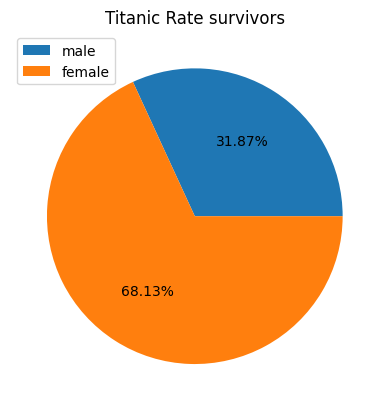

In [41]:
survivors = [men['Survived'].sum(),women['Survived'].sum()]
gender = df_train['Sex'].unique()

plt.pie(survivors,autopct='%.2f%%' )
plt.title('Titanic Rate survivors')
plt.legend(labels=gender)

Here we can see that almost three quarters of the survivors are women

Text(0.5, 1.0, 'Age of the passenger')

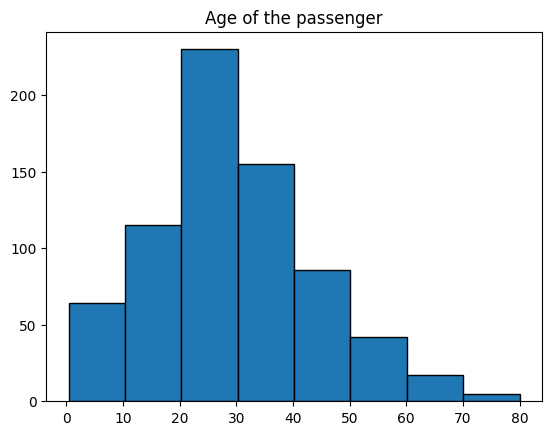

In [42]:
plt.hist(df_train['Age'], edgecolor = 'black',bins=8)
plt.title('Age of the passenger')

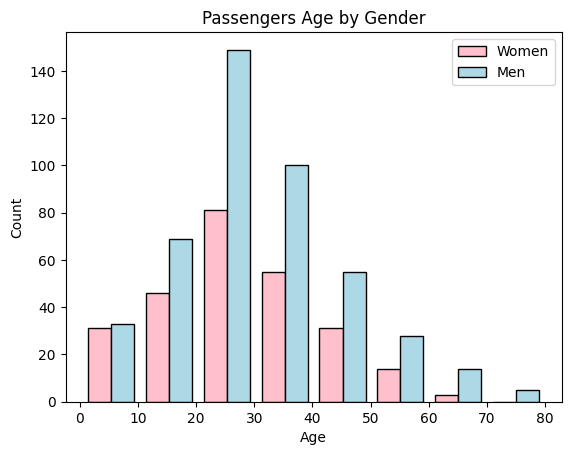

In [43]:
age_women = df_train[df_train['Sex'] == 'female']['Age']
age_men = df_train[df_train['Sex'] == 'male']['Age']

# Histograma dividido por género
plt.hist([age_women, age_men], 
         bins=8, 
         edgecolor='black', 
         label=['Women', 'Men'], 
         color=['pink', 'lightblue'])

plt.title('Passengers Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

As we can se, most of the passenger were between 20 and 30 years old

C:\Users\luiso\AppData\Local\Temp\ipykernel_4428\3934164677.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_women = df_train[df_train['Sex'] == 'female'][df_train['Survived'] == 1]['Age']
C:\Users\luiso\AppData\Local\Temp\ipykernel_4428\3934164677.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_men = df_train[df_train['Sex'] == 'male'][df_train['Survived'] == 1]['Age']


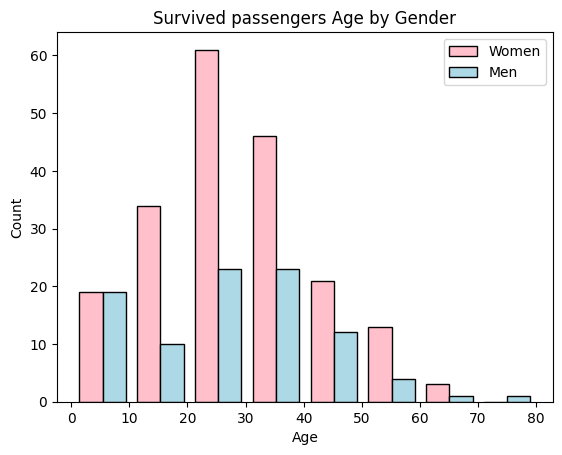

In [ ]:
age_women = df_train[df_train['Sex'] == 'female'][df_train['Survived'] == 1]['Age']
age_men = df_train[df_train['Sex'] == 'male'][df_train['Survived'] == 1]['Age']

plt.hist([age_women, age_men], 
         bins=8, 
         edgecolor='black', 
         label=['Women', 'Men'], 
         color=['pink', 'lightblue'])

plt.title('Survived passengers Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [45]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [46]:
df_train= df_train.drop(['Ticket','Fare'],axis=1)

In [47]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S


In [65]:
women_children = df_train[df_train['Sex'] == 'female'][df_train['Survived'] == 1][df_train['Parch'] >= 1][df_train['Age']>=20][df_train['Age'] <= 40]
women_children.head()

C:\Users\luiso\AppData\Local\Temp\ipykernel_4428\1094984234.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_children = df_train[df_train['Sex'] == 'female'][df_train['Survived'] == 1][df_train['Parch'] >= 1][df_train['Age']>=20][df_train['Age'] <= 40]
C:\Users\luiso\AppData\Local\Temp\ipykernel_4428\1094984234.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_children = df_train[df_train['Sex'] == 'female'][df_train['Survived'] == 1][df_train['Parch'] >= 1][df_train['Age']>=20][df_train['Age'] <= 40]
C:\Users\luiso\AppData\Local\Temp\ipykernel_4428\1094984234.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_children = df_train[df_train['Sex'] == 'female'][df_train['Survived'] == 1][df_train['Parch'] >= 1][df_train['Age']>=20][df_train['Age'] <= 40]
C:\Users\luiso\AppData\Local\Temp\ipykernel_4428\1094984234.py:1: UserWarning: Boolean Series key will be reindexed to

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
9,1,3,female,27.0,0,2,S
26,1,3,female,38.0,1,5,S
89,1,1,female,23.0,3,2,S
99,1,2,female,34.0,0,1,S
248,1,2,female,24.0,0,2,S


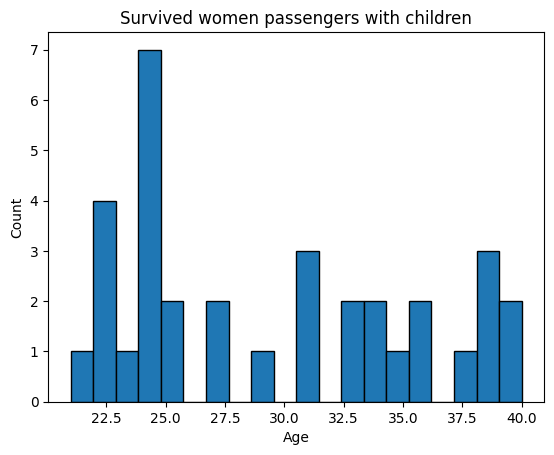

In [67]:
plt.hist(women_children['Age'], 
         bins=20, 
         edgecolor='black')

plt.title('Survived women passengers with children')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We took the range of woman that have one or more children with age between 20 and 40, as we can see, most of the young mothers on age range 21 to 25 survived

In [84]:
Class = df_train[['Pclass', 'Sex', 'Survived']]
men_class = Class[Class['Sex'] == 'male']


men_class.head()


,Pclass,Sex,Survived
PassengerId,,,
1,3,male,0
5,3,male,0
6,3,male,0
7,1,male,0
8,3,male,0


(array([122.,   0.,   0.,   0.,   0., 108.,   0.,   0.,   0., 347.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

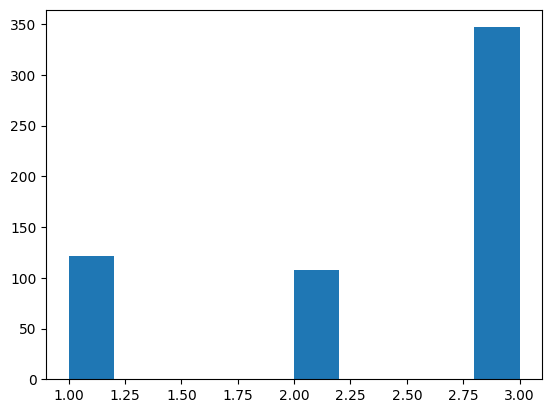

In [86]:
plt.hist(men_class['Pclass'])


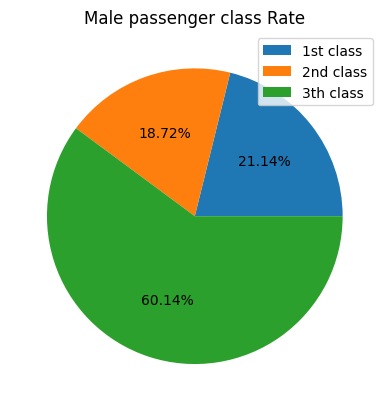

In [111]:
passenger_class = men_class['Pclass'].value_counts().sort_index()
Label_class = ['1st class', '2nd class', '3th class']

plt.pie(passenger_class,autopct='%.2f%%')
plt.title('Male passenger class Rate')
plt.legend(labels=Label_class)

Most of the male passengers were in third class

In [ ]:
women_class = Class[Class['Sex'] == 'female']

,Pclass,Sex,Survived
PassengerId,,,
1,3,male,0
5,3,male,0
6,3,male,0
7,1,male,0
8,3,male,0


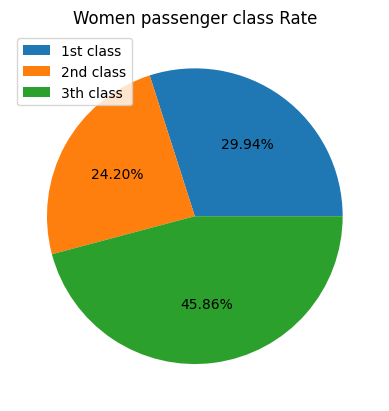

In [112]:
passenger_class = women_class['Pclass'].value_counts().sort_index()
Label_class = ['1st class', '2nd class', '3th class']

plt.pie(passenger_class,autopct='%.2f%%')
plt.title('Women passenger class Rate')
plt.legend(labels=Label_class)

Same as the male passengers, most of the woman were on third class.

In [120]:
survived_men_class = men_class[men_class['Survived']==1]
survived_men_class.head()

,Pclass,Sex,Survived
PassengerId,,,
18,2,male,1
22,2,male,1
24,1,male,1
37,3,male,1
56,1,male,1


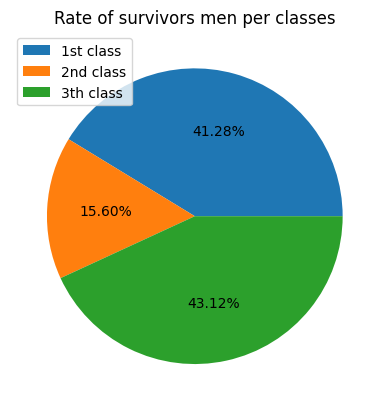

In [121]:
passenger_class = survived_men_class['Pclass'].value_counts().sort_index()
Label_class = ['1st class', '2nd class', '3th class']

plt.pie(passenger_class,autopct='%.2f%%')
plt.title('Rate of survivors men per classes')
plt.legend(labels=Label_class)

Most of the surviving male passengers were on the first and thitd class

In [122]:
survived_women_class = women_class[women_class['Survived']==1]
survived_women_class.head()

,Pclass,Sex,Survived
PassengerId,,,
2,1,female,1
3,3,female,1
4,1,female,1
9,3,female,1
10,2,female,1


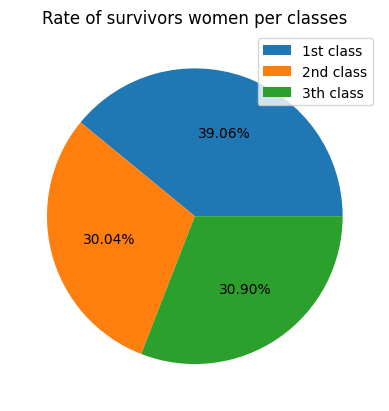

In [123]:
passenger_class = survived_women_class['Pclass'].value_counts().sort_index()
Label_class = ['1st class', '2nd class', '3th class']

plt.pie(passenger_class,autopct='%.2f%%')
plt.title('Rate of survivors women per classes')
plt.legend(labels=Label_class)

Here, in women case, we can see that the survivor rate between classes were more similar, but most of the survivors female passengers were in firts class, but same as the male case, the second class was the most affected. So we can conclude that the worst class to be were the second one.